<a href="https://colab.research.google.com/github/zahra-arjm/argue_bot/blob/main/visualization_wizards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload wizards_df.csv and participants_responsiveness_ids.json
from google.colab import files
uploaded = files.upload()

Saving wizards_df.csv to wizards_df.csv
Saving participants_responsiveness_ids.json to participants_responsiveness_ids.json


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['wizards_df.csv']))

In [ ]:
df.set_index('id', inplace=True)
df.head()

,topic,count_woz_or_bot_messages,count_acknowlegements,count_hedgings,count_negations,count_receptive_msgs,age,gender,take_part_again,recommend,...,non-doers_Irrational_before,non-doers_Irrational_after,non-doers_Ignorant_before,non-doers_Ignorant_after,non-doers_Unethical_before,non-doers_Unethical_after,non-doers_Immoral_before,non-doers_Immoral_after,non-doers_of_bad_moral_character_before,non-doers_of_bad_moral_character_after
id,,,,,,,,,,,,,,,,,,,,,
dial192_3eb6f2910b82292457588067f687dbd15c68883ffb5757e4f68d23029b8a535c,vaccination,4,4,3,0,3,34.0,female,Very likely,Yes,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
dial134_420b14b3c9fa235089bdba97dedcc6b05b4640ddf4740768baaabbe362758fa8,brexit,9,4,2,0,0,NaN,NaN,NaN,NaN,...,3,-1,3,-1,2,-1,2,-1,2,-1
dial11_1a80b6d59038eab65ea770f8c82b2f5676cb960dab63cb31542ac2f1a9dc69eb,veganism,4,0,0,0,0,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
dial129_b9f66cd34c13e812bfee00591c46d1cd2120f3f5335e4aca5e3f6a1e55aaa7c9,brexit,5,1,1,0,0,23.0,female,Very likely,Yes,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
dial149_017e445a7ca11cd522e519dfd6902ba46c1868d133bd4d6ef16edd9c6bde52ab,brexit,2,2,1,0,1,21.0,female,Very likely,Yes,...,4,4,1,4,4,4,4,4,4,4


Only keep conversations who answered at leat on question ('before' and 'after')

In [ ]:
# load participant ids for non-responsives
participants_ids_dict = pd.read_json('participants_responsiveness_ids.json', lines=True)
df = df.loc[participants_ids_dict['wizards'][0]['responsives'],:]

Calculate average changes in opinions for the opposite group. In the case of "no vote" in brexit group, both the change in opinion in both groups will be added.

In [ ]:
# split doers/non-doers/no votes
doers_ids = df[df['doer or not'] == 'yes'].index
nondoers_ids = df[(df['doer or not'] == 'against (remain)') | (df['doer or not'] == 'no')].index
non_action_ids = df.loc[(~df.index.isin(doers_ids)) & (~df.index.isin(nondoers_ids))].index


In [ ]:
# split questions into "before"/"after" and "doers"/"nondoers"
after_cols = df.columns[df.columns.str.endswith('after')]
before_cols = df.columns[df.columns.str.endswith('before')]
doers_cols = df.columns[df.columns.str.startswith('doers')]
nondoers_cols = df.columns[df.columns.str.startswith('non-doers')]

In [ ]:
for id in df.index:
  sum_movement = 0
  count_questions = 0
  if id in doers_ids:
    opp_before = nondoers_cols.intersection(before_cols)
    opp_after = nondoers_cols.intersection(after_cols)
  elif id in nondoers_ids:
    opp_before = doers_cols.intersection(before_cols)
    opp_after = doers_cols.intersection(after_cols)
  else:
    opp_before = before_cols
    opp_after = after_cols

  for idx, before_col in enumerate(opp_before):
    # if participants had answered to both "before" and "after" questions
    if (df.loc[id, before_col] > 0) \
    & (df.loc[id, opp_after[idx]] > 0):
      count_questions += 1
    # reverse scoring for the question about 'good reasons'
      if 'good_reasons' in before_col:
        sum_movement = sum_movement + \
             df.loc[id, opp_after[idx]] - \
             df.loc[id, before_col]
      else:
        sum_movement = sum_movement - \
             df.loc[id, opp_after[idx]] + \
             df.loc[id, before_col]  
  df.loc[id, 'average_movement'] = sum_movement / count_questions


Calculate the participants opinion about their interaction with the wizards.

In [ ]:
positive_cols = ['Enjoyable', 'Engaging', 'Natural', 'Clear', 'Persuasive']
negative_cols = ['Confusing', 'Frustrating', 'Too_Complicated', 'Boring']

# the participants either answered to all the questions about the survey or
# answered none of them
# I reverse coded the negative columns and averaged all the sum
# then centered the result around 3.5 to make it symmetric
df['conversation_rating'] = \
  (df.loc[:, positive_cols].sum(axis=1) \
  + (7 * len(negative_cols))- df.loc[:, negative_cols].sum(axis=1)) \
  / (len(negative_cols) + len(positive_cols)) \
  - 3.5

In [ ]:
# number of conversations with negative ratings
(df['conversation_rating'] < 0).sum()


12

Add a column for frequency of acknowledgement and hedgings used. If the frequency becomes more than 1 per message, show just 1.

In [ ]:
import numpy as np
df['acknowledge_hedging_frequency'] = \
  np.where(
  (df['count_acknowlegements'] + df['count_hedgings']) < df['count_woz_or_bot_messages'],
  (df['count_acknowlegements'] + df['count_hedgings']) / df['count_woz_or_bot_messages'],
   1)

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Distribution of number of messages

(array([ 7., 48., 44., 12.,  5.,  2.,  2.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15.]),
 <BarContainer object of 7 artists>)

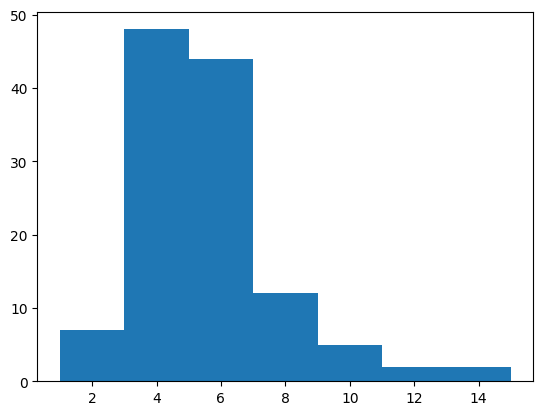

In [ ]:
plt.hist(df['count_woz_or_bot_messages'], bins=np.arange(1,16,2))

Check the distribution of number of acknowledgements and hedgings.

In [ ]:
#  There was only one negation used:
df[df['count_negations'] > 0].index

Index(['dial122_570484c1fcf85c05d3888c116ea02d6fdd23e7330ff3fe8c6aca11afb14928f7'], dtype='object', name='id')

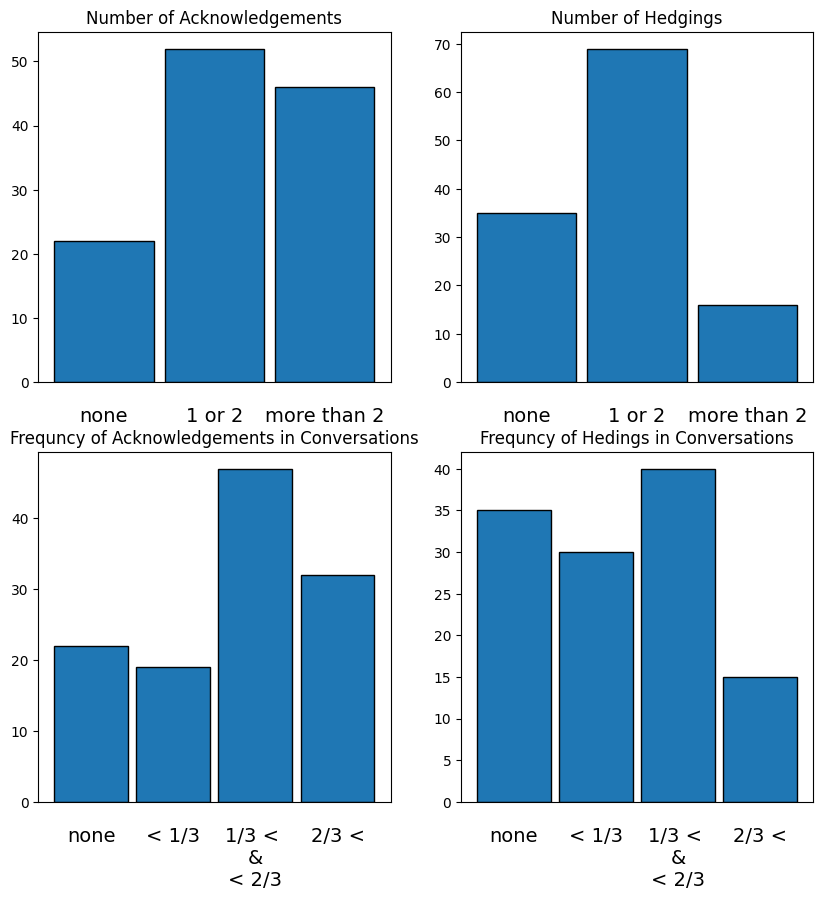

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

counts, bins = np.histogram(df['count_acknowlegements'], bins=[-.5, .5, 2.5, 6])
bin_centers = np.arange(0, len(bins)-1)
ax[0, 0].axes.get_xaxis().set_visible(False)
ax[0, 0].bar(range(len(bins)-1), counts, width=.9, edgecolor='k')
labels = ['none', '1 or 2', 'more than 2']
for idx, x in enumerate(bin_centers):
  ax[0, 0].annotate(labels[idx], xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center',
        fontsize = 14)
ax[0, 0].set_title('Number of Acknowledgements')

counts, bins = np.histogram(df['count_hedgings'], bins=[-.5, .5, 2.5, 6])
bin_centers = np.arange(0, len(bins)-1)
ax[0, 1].axes.get_xaxis().set_visible(False)
ax[0, 1].bar(range(len(bins)-1), counts, width=.9, edgecolor='k')

for idx, x in enumerate(bin_centers):
  ax[0, 1].annotate(labels[idx], xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center',
        fontsize = 14)
ax[0, 1].set_title('Number of Hedgings')

counts, bins = np.histogram(df['count_acknowlegements'] / df['count_woz_or_bot_messages'],
                            bins=[-.05,.05, .33, .66, 1.05])
bin_centers = np.arange(0, len(bins)-1)
ax[1, 0].axes.get_xaxis().set_visible(False)
ax[1, 0].bar(range(len(bins)-1), counts, width=.9, edgecolor='k')

labels = ['none', '< 1/3', '1/3 < \n&\n< 2/3', '2/3 <']
for idx, x in enumerate(bin_centers):
  ax[1, 0].annotate(labels[idx], xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center',
        fontsize = 14)
ax[1, 0].set_title('Frequncy of Acknowledgements in Conversations')

counts, bins = np.histogram(df['count_hedgings'] / df['count_woz_or_bot_messages'],
                            bins=[-.05,.05, .33, .66, 1.05])
bin_centers = np.arange(0, len(bins)-1)
ax[1, 1].axes.get_xaxis().set_visible(False)
ax[1, 1].bar(range(len(bins)-1), counts, width=.9, edgecolor='k')

labels = ['none', '< 1/3', '1/3 < \n&\n< 2/3', '2/3 <']
for idx, x in enumerate(bin_centers):
  ax[1, 1].annotate(labels[idx], xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center',
        fontsize = 14)
ax[1, 1].set_title('Frequncy of Hedings in Conversations')

plt.show()

Check how was the movemont distribution

Text(0.5, 1.0, 'Histogram of number of average movement(change in Stanley measure on average)')

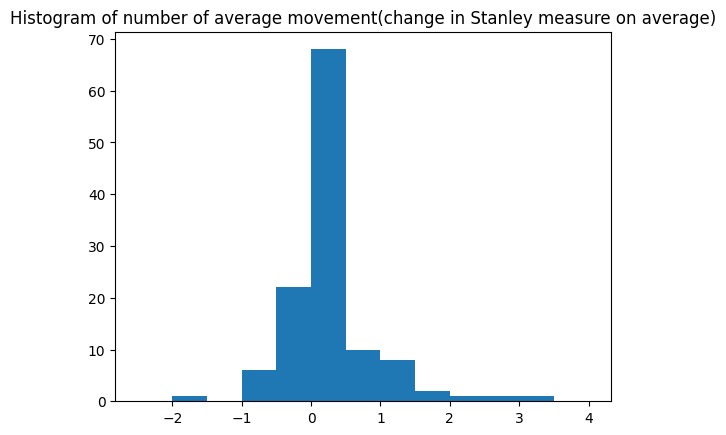

In [ ]:
plt.hist(df['average_movement'], bins=np.arange(-2.5, 4.5, .5))
plt.title('Histogram of number of average movement(change in Stanley measure on average)')

In [ ]:
print('Median of change in average Stanley measure:')
df['average_movement'].median()

Median of change in average Stanley measure:


0.0

Distribution of conversation receptiveness

Text(0.5, 1.0, 'Histogram of number of receptive messages in conversations')

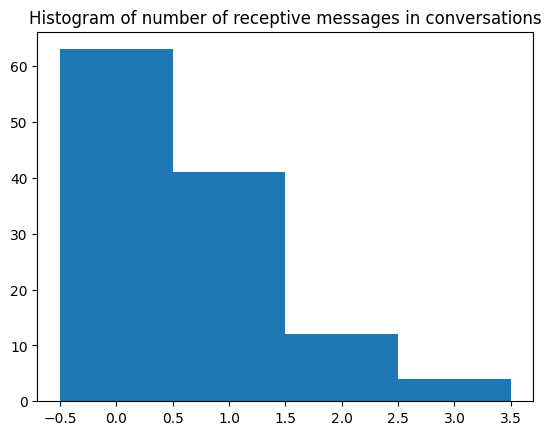

In [ ]:
plt.hist(df['count_receptive_msgs'], bins=np.arange(-.5, 4.5, 1))
plt.title('Histogram of number of receptive messages in conversations')

In [ ]:
# check frequency of conversations with certain characteristics
freq_conv_more_than_one_receptive = (df['count_receptive_msgs'] > 0).sum() / \
  len(df)
freq_conv_more_than_one_acknwoledge_or_hedgigns = \
  ((df['count_acknowlegements'] > 0) | (df['count_hedgings'] > 0)).sum() / \
  len(df)
print(f"Frequency of conversations with at least one receptive message: \
  {freq_conv_more_than_one_receptive}")
print(f"Frequency of conversations with at least one acknowlegement or hedging used: \
  {freq_conv_more_than_one_acknwoledge_or_hedgigns}")

Frequency of conversations with at least one receptive message:   0.475
Frequency of conversations with at least one acknowlegement or hedging used:   0.8916666666666667


In [ ]:
((df['count_acknowlegements'] > 0) | (df['count_hedgings'] > 0)).sum()

107

Text(0.5, 1.0, 'Histogram of frequency of receptive messages')

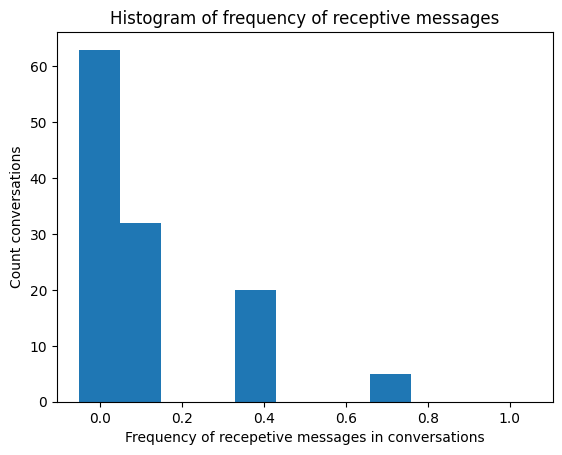

In [ ]:
plt.hist(df['count_receptive_msgs'] / df['count_woz_or_bot_messages'],
         bins=[-.05, .05, .33, .66, 1.05],
         width=.1)
plt.xlabel('Frequency of recepetive messages in conversations')
plt.ylabel('Count conversations')
plt.title('Histogram of frequency of receptive messages')

Most people did not changed their mind. However, 23 people changed positively at least by 1 point (averaged over all questions) and 7 people changed their minds in the negative direction after the conversation with wizards!
Let's take a look at the relationship between using acknowledgement/hedging with change of beliefs:

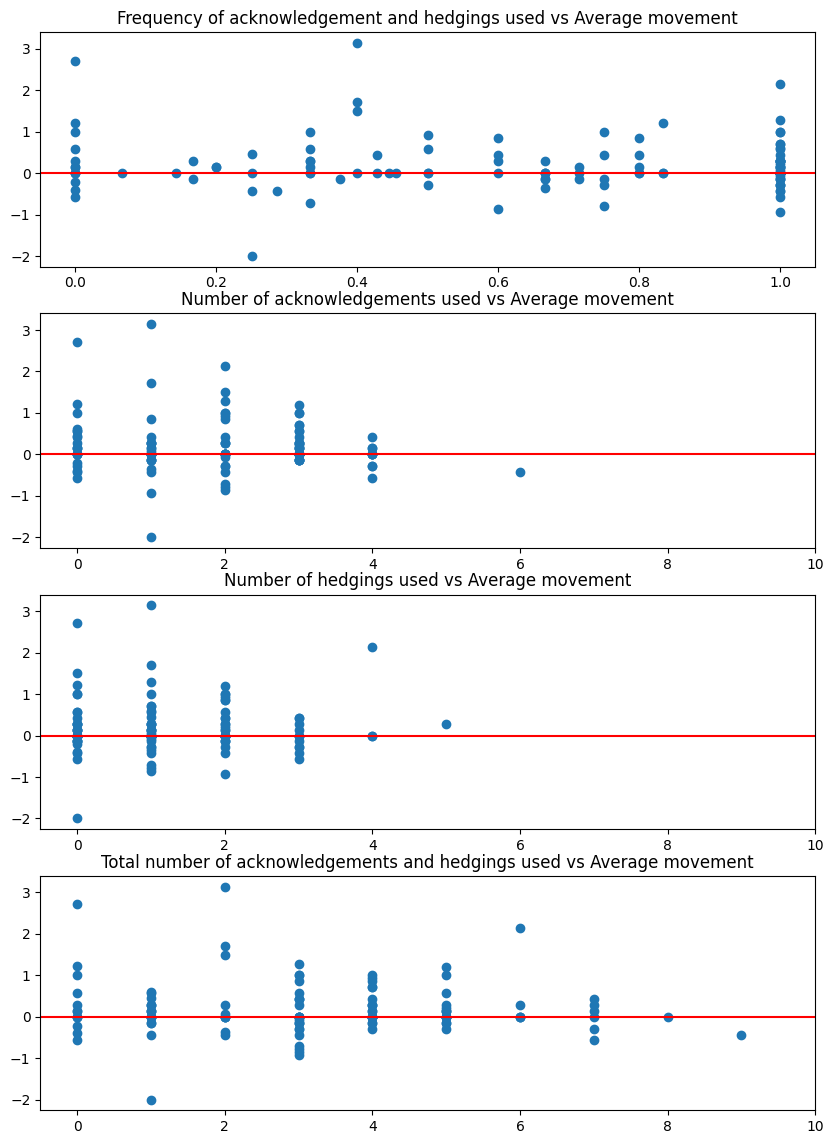

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 14))

ax[0].scatter(df['acknowledge_hedging_frequency'], df['average_movement'])
ax[0].axhline(y=0, color='r')
ax[0].set_title('Frequency of acknowledgement and hedgings used vs Average movement')
ax[1].scatter(df['count_acknowlegements'], df['average_movement'])
ax[1].set_title('Number of acknowledgements used vs Average movement')
ax[2].scatter(df['count_hedgings'], df['average_movement'])
ax[2].set_title('Number of hedgings used vs Average movement')
ax[3].scatter(df['count_acknowlegements'] + df['count_hedgings'], df['average_movement'])
ax[3].set_title('Total number of acknowledgements and hedgings used vs Average movement')

for idx in range(1, 4):
  ax[idx].set_xlim([-.5, 10])
  ax[idx].axhline(y=0, color='r')
plt.show()

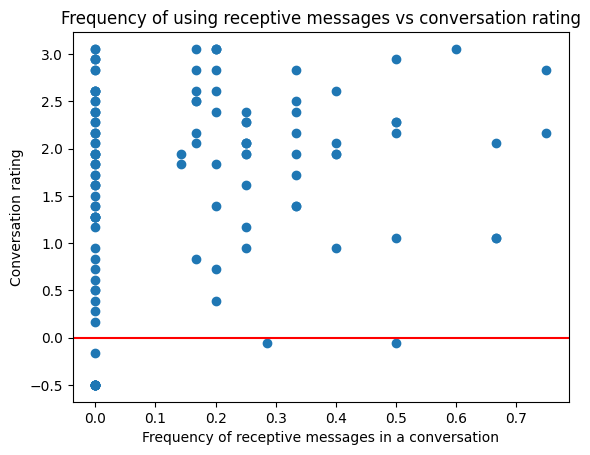

In [ ]:
plt.scatter(df['count_receptive_msgs'] / df['count_woz_or_bot_messages'], df['conversation_rating'])
plt.axhline(y=0, color='r')
plt.title('Frequency of using receptive messages vs conversation rating')
plt.xlabel('Frequency of receptive messages in a conversation')
plt.ylabel('Conversation rating')
plt.show()